In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="background-color: #bdbbbb; color: white; padding:10px">Conhecendo a base de dados</h1>

Base de dados com dados referentes a preços de aluguéis de diferentes imóveis do Rio de Janeiro, além de um quadro no trello com as demandas e atividades que precisamos realizar no decorrer do projeto.

In [2]:
dados = pd.read_csv('data/aluguel.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
dados['Tipo'] # pandas.core.series.Series

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [5]:
dados[['Quartos', 'Valor']] # pandas.core.frame.DataFrame

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


<h2 style="background-color: gray; color: white;">EDA - Exploratory Data Analysis</h2>  

__Algumas perguntas que podemos fazer nesse momento:__  

1. Quais os valores médios de aluguel por tipo de imóvel?     
        
```python
 dados.groupby('Tipo')['Valor'].mean() 
```
Gera uma Series. Para gerar um DataFrame colocamos:  
```python
 dados.groupby('Tipo')[['Valor']].mean() 
```

2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [6]:
# Agrupar os dados com base no tipo de imóvel.
df_precos_tipos = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor')
df_precos_tipos

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


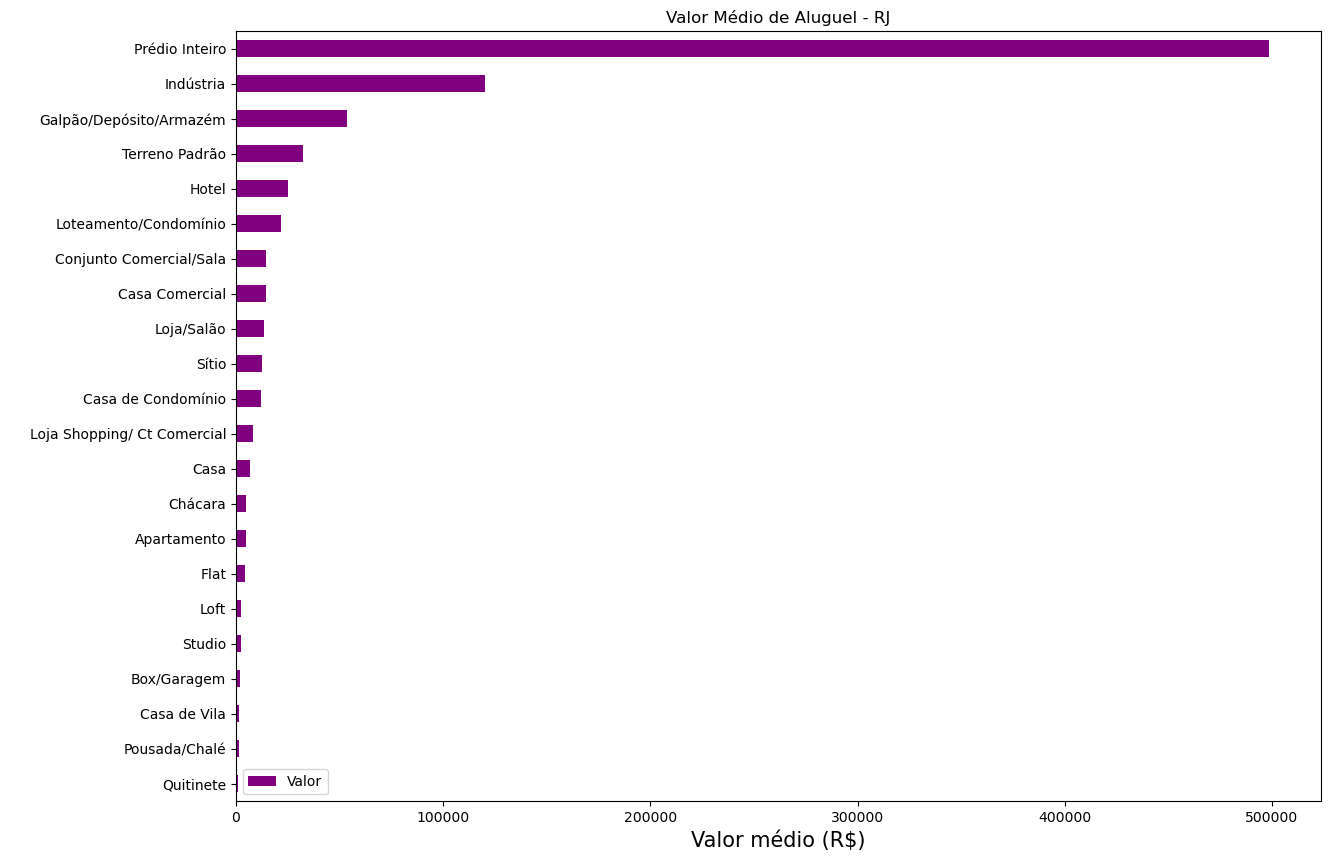

In [7]:
df_precos_tipos.plot(kind='barh', figsize=(14, 10), color='purple');
plt.title("Valor Médio de Aluguel - RJ")
plt.xlabel("Valor médio (R$)", fontsize=15)
plt.ylabel(" ");

<h3 style="background-color: gray; color: white;">Removendo imóveis comerciais</h3>

In [11]:
# listar todos os tipos de imóveis da base de dados
print(f'Tipos de imóveis na base de dados:\n{dados.Tipo.unique()}')

# Lista com imoveis comerciais
imoveis_comerciais: list[str] = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

Tipos de imóveis na base de dados:
['Quitinete' 'Casa' 'Conjunto Comercial/Sala' 'Apartamento'
 'Casa de Condomínio' 'Prédio Inteiro' 'Flat' 'Loja/Salão'
 'Galpão/Depósito/Armazém' 'Casa Comercial' 'Casa de Vila'
 'Terreno Padrão' 'Box/Garagem' 'Loft' 'Loja Shopping/ Ct Comercial'
 'Chácara' 'Loteamento/Condomínio' 'Sítio' 'Pousada/Chalé' 'Studio'
 'Hotel' 'Indústria']


In [16]:
dados.query('@imoveis_comerciais in Tipo') # DataFrame com apenas imóveis comerciais


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [20]:
df = dados.query('@imoveis_comerciais not in Tipo') # DataFrame com imóveis não-comerciais
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


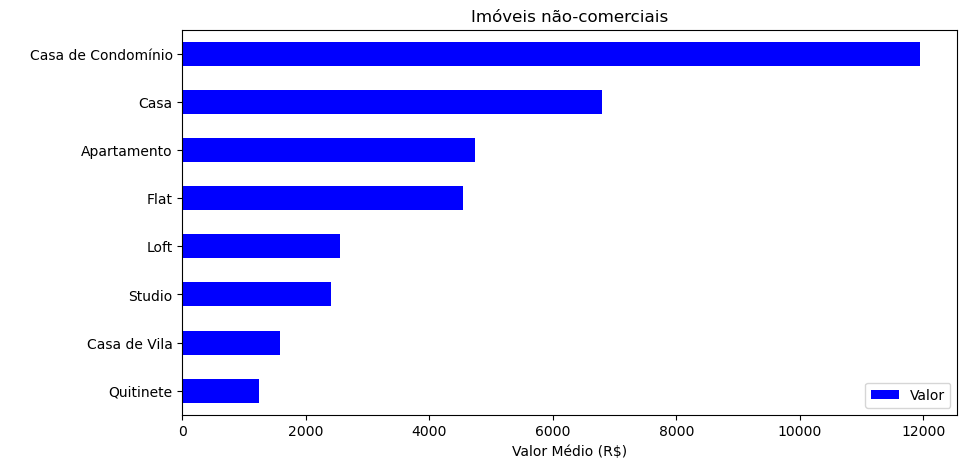

In [26]:
# Agrupar os tipos por valor e fazer o gráfico pela media
df_preco_tipo = df.groupby("Tipo")[["Valor"]].mean().sort_values(by="Valor")
df_preco_tipo.plot(kind='barh',figsize=(10,5), color='blue')
plt.title("Imóveis não-comerciais")
plt.xlabel("Valor Médio (R$)")
plt.ylabel(' ');

<h3 style="background-color: gray; color: white;">Percentual de cada tipo de imóvel na base de dados</h3>  

-  Essa análise é interessante para saber quanto os dados estão desbalanceados. O time de ML poderia ter conclusões precipitadas se não obtiverem o "mesmo espaço amostral" de cada categoria.  

O método `value_counts()` do Pandas é usado para retornar uma série contendo contagens de valores únicos em uma coluna ou em um objeto Series do Pandas.

In [ ]:
df['Tipo'].value_counts(normalize=True) #Series

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [41]:
df['Tipo'].value_counts(normalize=True).to_frame().sort_values(by='proportion', ascending=True) 


,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [ ]:
df_percentual = df['Tipo'].value_counts(normalize=True).to_frame().sort_values(by='proportion', ascending=True) 
df_percentual

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [66]:
# Renomear a coluna
df_percentual.rename(columns={'proportion': 'Percentual (%)'}, inplace=True)
df_percentual

,Percentual (%)
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: ylabel='Tipo'>

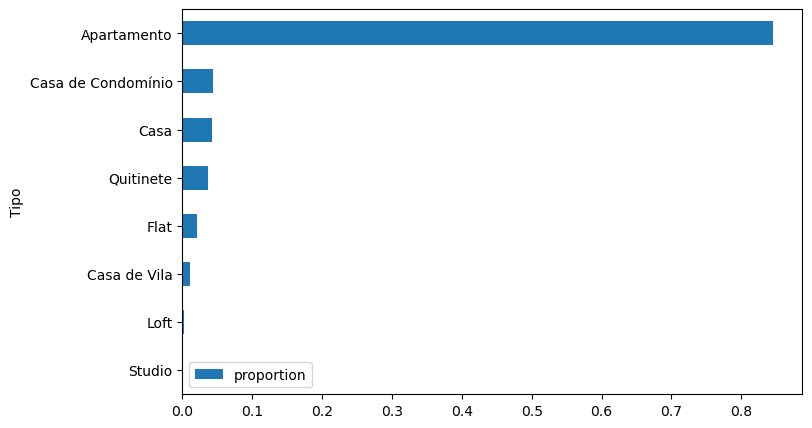

In [64]:
df_percentual.plot(kind='barh', figsize=(8,5))




Mais de 80% do `aluguel.csv` é conteúdo de Apartamentos. A análise então será direcionada apenas para esse subconjunto.

In [65]:
df_apartamentos = dados.query("Tipo == 'Apartamento'")
df_apartamentos.head(8)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


<h4 style="background-color: gray; color: white;">Desafio </h4>    

1.  Calcular a média de quartos por apartamento;  
2.  Conferir quantos bairros únicos existem na nossa base de dados;  
3.  Analisar quais bairros possuem a média de valor de aluguel mais elevadas;  
4.  Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.  

In [69]:
#1 
df_apartamentos['Quartos'].mean()

2.481568707761622

In [80]:
#2 
df['Bairro'].unique().size
# df['Bairro'].nunique()

154

In [ ]:
#3
df_apartamentos.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor')

,Valor
Bairro,
Ricardo de Albuquerque,340.000000
Paciência,510.000000
Santa Cruz,590.000000
Cosmos,610.000000
Inhoaíba,650.000000
...,...
Botafogo,9369.207116
Ipanema,9487.205317
Cidade Jardim,12000.000000


<Axes: ylabel='Bairro'>

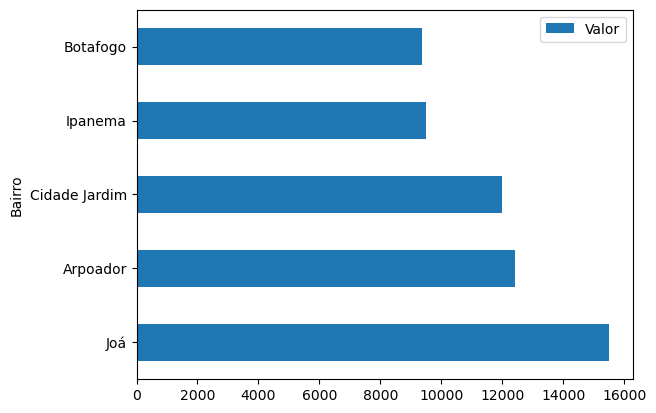

In [79]:
#4
bairros_mais_caros = df_apartamentos.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor',ascending=False)
bairros_mais_caros.head(5).plot(kind='barh')